# 📊 Data Preprocessing - Student Performance Prediction

## 📋 Objective
Load, clean, and prepare student data for machine learning modeling.

## 🎯 Goals
1. Load student performance dataset
2. Explore data structure and quality
3. Handle missing values and outliers
4. Create target variable (risk categories)
5. Prepare data for modeling

In [2]:
# 📚 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import joblib
from ucimlrepo import fetch_ucirepo

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)


print("📚 Libraries imported successfully!")

📚 Libraries imported successfully!


## 📁 Data Loading

In [3]:
def load_data():
    # Fetch dataset from UCI repo (ID = 320)
    student_performance = fetch_ucirepo(id=320)

    # Merge features and targets into one DataFrame
    X = student_performance.data.features
    y = student_performance.data.targets
    df = pd.concat([X, y], axis=1)

    print(f"✅ Dataset loaded: {df.shape}")
    return df

# Usage
df = load_data()
print(df.head())


✅ Dataset loaded: (649, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famre

## 🔍 Data Exploration

In [4]:
# Basic information about the dataset
print("📋 Dataset Info:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"\n📊 Column Types:")
print(df.dtypes.value_counts())

# Display first few rows
print("\n🔍 First 5 rows:")
df.head()

📋 Dataset Info:
Rows: 649
Columns: 33

📊 Column Types:
object    17
int64     16
Name: count, dtype: int64

🔍 First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
# Check for missing values
print("❓ Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

# Basic statistics
print("\n📈 Numeric Columns Summary:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe()

❓ Missing Values:
✅ No missing values found!

📈 Numeric Columns Summary:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## 🎯 Target Variable Creation

🎯 Risk Category Distribution:
High_Risk: 100 (15.4%)
Medium_Risk: 355 (54.7%)
Low_Risk: 194 (29.9%)


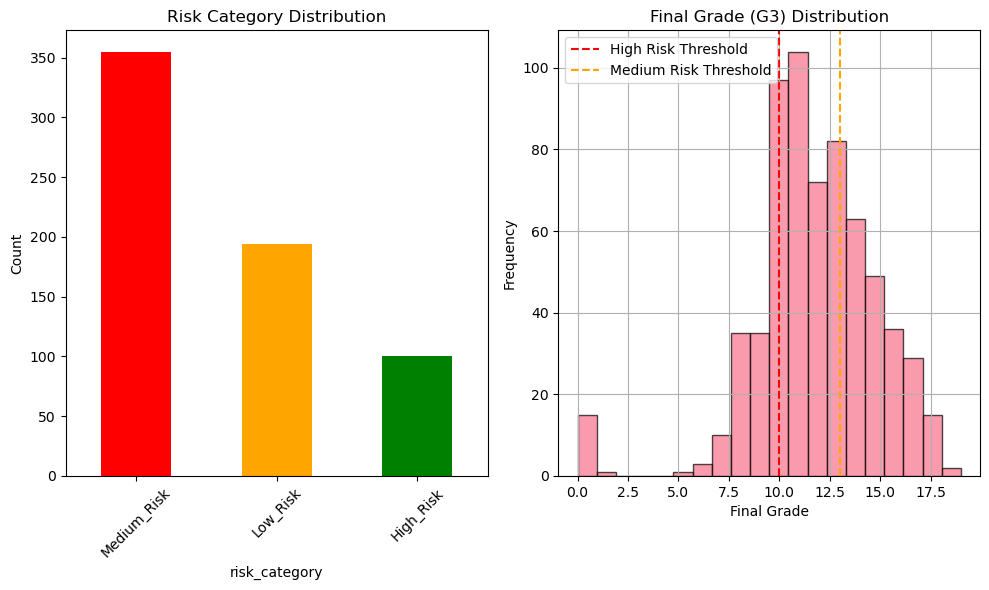

In [6]:
def create_risk_categories(df):
    """
    Create risk categories based on final grade (G3)
    
    Risk Categories:
    - High Risk: G3 < 10 (failing)
    - Medium Risk: 10 <= G3 <= 13 (at risk)
    - Low Risk: G3 > 13 (performing well)
    """
    df = df.copy()
    
    def categorize_risk(grade):
        if grade < 10:
            return 'High_Risk'
        elif grade <= 13:
            return 'Medium_Risk'
        else:
            return 'Low_Risk'
    
    df['risk_category'] = df['G3'].apply(categorize_risk)
    
    return df

# Create target variable
df = create_risk_categories(df)

# Display target distribution
print("🎯 Risk Category Distribution:")
risk_counts = df['risk_category'].value_counts()
risk_pct = df['risk_category'].value_counts(normalize=True) * 100

for category in ['High_Risk', 'Medium_Risk', 'Low_Risk']:
    if category in risk_counts:
        print(f"{category}: {risk_counts[category]} ({risk_pct[category]:.1f}%)")

# Visualize target distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
risk_counts.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Risk Category Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['G3'].hist(bins=20, alpha=0.7, edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', label='High Risk Threshold')
plt.axvline(x=13, color='orange', linestyle='--', label='Medium Risk Threshold')
plt.title('Final Grade (G3) Distribution')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## 🔧 Data Preprocessing

In [7]:
# Identify feature types
numeric_features = []
categorical_features = []

for col in df.columns:
    if col in ['G3', 'risk_category']:  # Skip target variables
        continue
    
    if df[col].dtype in ['int64', 'float64']:
        numeric_features.append(col)
    else:
        categorical_features.append(col)

print(f"📊 Numeric features ({len(numeric_features)}): {numeric_features}")
print(f"📝 Categorical features ({len(categorical_features)}): {categorical_features}")

# Check for outliers in numeric features
if numeric_features:
    print("\n🔍 Checking for outliers...")
    for col in numeric_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

📊 Numeric features (15): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
📝 Categorical features (17): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

🔍 Checking for outliers...
age: 1 outliers (0.2%)
traveltime: 16 outliers (2.5%)
studytime: 35 outliers (5.4%)
failures: 100 outliers (15.4%)
famrel: 51 outliers (7.9%)
freetime: 45 outliers (6.9%)
Dalc: 34 outliers (5.2%)
absences: 21 outliers (3.2%)
G1: 16 outliers (2.5%)
G2: 25 outliers (3.9%)


## 💾 Save Processed Data

In [8]:
# Create data directory if it doesn't exist
data_dir = Path('../data')
data_dir.mkdir(exist_ok=True)

# Save processed data
processed_data_path = data_dir / 'processed_student_data.csv'
df.to_csv(processed_data_path, index=False)

# Save feature information
feature_info = {
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
    'target_column': 'risk_category',
    'grade_column': 'G3'
}

import joblib
feature_info_path = data_dir / 'feature_info.pkl'
joblib.dump(feature_info, feature_info_path)

print(f"✅ Processed data saved to: {processed_data_path}")
print(f"✅ Feature info saved to: {feature_info_path}")
print(f"\n📊 Final dataset shape: {df.shape}")
print(f"🎯 Target classes: {df['risk_category'].unique()}")

# Display sample of final data
print("\n🔍 Sample of processed data:")
df.head(10)

✅ Processed data saved to: ..\data\processed_student_data.csv
✅ Feature info saved to: ..\data\feature_info.pkl

📊 Final dataset shape: (649, 34)
🎯 Target classes: ['Medium_Risk' 'Low_Risk' 'High_Risk']

🔍 Sample of processed data:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,risk_category
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Medium_Risk
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Medium_Risk
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Medium_Risk
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Low_Risk
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Medium_Risk
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,Medium_Risk
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,Medium_Risk
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,Medium_Risk
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,Low_Risk
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,Medium_Risk


## 📊 Data Summary

### ✅ Preprocessing Complete!

**Data Overview:**
- Dataset successfully loaded and processed
- Target variable created (High/Medium/Low Risk categories)
- Features identified and categorized
- Data quality checked (missing values, outliers)
- Processed data saved for modeling

**Next Steps:**
1. Proceed to `02_modeling.ipynb` for model training
2. Compare different algorithms
3. Select best performing model